# Portfelli anaüüs (LHV)

In [1]:
using Dates 
periodstart = Date(2021, 1, 1);
periodend = Date(2021, 12, 31);

In [2]:
using Pkg

Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("MarketData");
Pkg.add("Glob");
Pkg.add("Plots");
Pkg.add("StatsPlots");
Pkg.add("PlotlyJS");
Pkg.add("PlotlyBase");
Pkg.add("WebIO");

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Ch

In [79]:
using CSV
using DataFrames
using MarketData
using Glob
using Statistics

In [80]:
tradefiles = glob("data/*-trades.csv")

5-element Vector{String}:
 "data/2017-trades.csv"
 "data/2018-trades.csv"
 "data/2019-trades.csv"
 "data/2020-trades.csv"
 "data/2021-trades.csv"

In [81]:
alltradesdf = reduce(vcat, DataFrame.(CSV.File.(tradefiles)));
alltradesdf[:,"VÄÄRTUSPÄEV"] = Date.(alltradesdf[:,"VÄÄRTUSPÄEV"])
alltradesdf[:,"TEHINGUPÄEV"] = Date.(alltradesdf[:,"TEHINGUPÄEV"])
alltradesdf = alltradesdf[in.(alltradesdf."TEHING", Ref(["ost", "müük"])), :]
# Replace temporary symbols
alltradesdf[alltradesdf."SÜMBOL" .== "EfTEN5", "SÜMBOL"] .= "EFT1T";

alltradesdf = sort!(alltradesdf, ["TEHINGUPÄEV"])

alltradesdf.CUMKOGUS .= 0
for sym in unique(alltradesdf[!,"SÜMBOL"])
    alltradesdf[alltradesdf."SÜMBOL" .== sym, "CUMKOGUS"] = cumsum(alltradesdf[alltradesdf."SÜMBOL" .== sym, "KOGUS"])
end
# alltradesdf[!, ["SÜMBOL", "TEHINGUPÄEV", "CUMKOGUS"]]

In [82]:
tickers = unique(alltradesdf[:,"SÜMBOL"])
function map_symbols(sym)
    if sym in ["SXR8", "VUSA"]
        return sym * ".DE"
    elseif sym in ["TVE1T", "MRK1T", "EFT1T", "TKM1T"]
        return sym * ".TL"
    elseif sym in ["GRG1L", "KNF1L"]
        return sym * ".VS"
    elseif sym in ["GZE1R"]
        return sym * ".RG"
    elseif sym in ["LEO", "SWEDA"]
        if sym == "SWEDA"
            sym = "SWED-A"
        end
        return sym * ".ST"
    elseif sym == "LQDA"
        return "IBCD.DE"
    end
    sym
end

alltradesdf[:,"SÜMBOL"] = map(map_symbols, alltradesdf[:,"SÜMBOL"])

tickers = map(map_symbols, tickers)

12-element Vector{String}:
 "TKM1T.TL"
 "GZE1R.RG"
 "EFT1T.TL"
 "KNF1L.VS"
 "MRK1T.TL"
 "SWED-A.ST"
 "LEO.ST"
 "IBCD.DE"
 "SXR8.DE"
 "VUSA.DE"
 "TVE1T.TL"
 "GRG1L.VS"

In [83]:
currentyeardf = alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), :]

,VÄÄRTUSPÄEV,TEHINGUPÄEV,TEHING,SÜMBOL,VÄÄRTPABER
,Date,Date,String15,String15,String
1,2017-05-03,2017-04-28,ost,TKM1T.TL,Tallinna Kaubamaja Grupp
2,2017-07-11,2017-07-07,ost,GZE1R.RG,Latvijas Gaze
3,2018-04-13,2018-04-11,ost,EFT1T.TL,EfTEN Real Estate Fund III
4,2019-04-10,2019-04-08,ost,TKM1T.TL,Tallinna Kaubamaja Grupp
5,2019-06-10,2019-06-06,ost,EFT1T.TL,EfTEN Real Estate Fund III aktsia täiendav 5
6,2019-07-10,2019-07-08,ost,KNF1L.VS,AB Klaipedos Nafta PVA
7,2019-10-10,2019-10-08,ost,MRK1T.TL,Merko Ehitus
8,2020-01-10,2020-01-08,ost,SWED-A.ST,Swedbank A
9,2020-04-01,2020-03-30,ost,SWED-A.ST,Swedbank A


In [84]:
prevtradesdf = alltradesdf[alltradesdf."TEHINGUPÄEV" .<= periodstart, :]
numcols = names(prevtradesdf, findall(x -> eltype(x) <: Number, eachcol(prevtradesdf)))
prevtradesdf = combine(groupby(prevtradesdf, ["SÜMBOL", "VALUUTA"]), numcols .=> sum .=> numcols)
prevtradesdf."TEHING" .= "ost"
prevtradesdf."TEHINGUPÄEV" .= periodstart
prevtradesdf."VÄÄRTUSPÄEV" .= periodstart
prevtradesdf."VÄÄRTPABER" .= "Dummy Value"
prevtradesdf."KOMMENTAAR" .= ""


prevtradesdf

,SÜMBOL,VALUUTA,KOGUS,HIND,NETOSUMMA,TEENUSTASU,KOKKU,VIIDE,CUMKOGUS
,String15,String3,Float64,Float64,Float64,Float64,Float64,Int64,Int64


In [85]:
currentyeardf = sort!(vcat(currentyeardf, prevtradesdf), ["TEHINGUPÄEV"])

,VÄÄRTUSPÄEV,TEHINGUPÄEV,TEHING,SÜMBOL,VÄÄRTPABER
,Date,Date,String,String15,String
1,2017-05-03,2017-04-28,ost,TKM1T.TL,Tallinna Kaubamaja Grupp
2,2017-07-11,2017-07-07,ost,GZE1R.RG,Latvijas Gaze
3,2018-04-13,2018-04-11,ost,EFT1T.TL,EfTEN Real Estate Fund III
4,2019-04-10,2019-04-08,ost,TKM1T.TL,Tallinna Kaubamaja Grupp
5,2019-06-10,2019-06-06,ost,EFT1T.TL,EfTEN Real Estate Fund III aktsia täiendav 5
6,2019-07-10,2019-07-08,ost,KNF1L.VS,AB Klaipedos Nafta PVA
7,2019-10-10,2019-10-08,ost,MRK1T.TL,Merko Ehitus
8,2020-01-10,2020-01-08,ost,SWED-A.ST,Swedbank A
9,2020-04-01,2020-03-30,ost,SWED-A.ST,Swedbank A


In [86]:
currentyeardf[!, ["SÜMBOL", "TEHINGUPÄEV", "CUMKOGUS", "VALUUTA"]]

,SÜMBOL,TEHINGUPÄEV,CUMKOGUS,VALUUTA
,String15,Date,Int64,String3
1,TKM1T.TL,2017-04-28,55,EUR
2,GZE1R.RG,2017-07-07,56,EUR
3,EFT1T.TL,2018-04-11,36,EUR
4,TKM1T.TL,2019-04-08,165,EUR
5,EFT1T.TL,2019-06-06,51,EUR
6,KNF1L.VS,2019-07-08,1800,EUR
7,MRK1T.TL,2019-10-08,65,EUR
8,SWED-A.ST,2020-01-08,89,SEK
9,SWED-A.ST,2020-03-30,177,SEK


In [87]:
function download(ticker)
    data = yahoo(ticker, YahooOpt(period1=DateTime(periodstart)-Dates.Day(7), period2=DateTime(periodend), interval="1d"));
    df = DataFrame(data);
    df[!, "Ticker"] .= ticker;
    df
end
tickersdf = reduce(vcat, [download(ticker) for ticker in tickers])
tickersdf = tickersdf[completecases(tickersdf), :]

,timestamp,Open,High,Low,Close,AdjClose,Volume,Ticker
,Date,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String
1,2016-12-27,8.15,8.18,8.15,8.18,5.30498,9874.0,TKM1T.TL
2,2016-12-28,8.18,8.24,8.17,8.24,5.34389,3853.0,TKM1T.TL
3,2016-12-29,8.24,8.24,8.15,8.23,5.3374,7697.0,TKM1T.TL
4,2016-12-30,8.25,8.3,8.23,8.25,5.35037,1853.0,TKM1T.TL
5,2017-01-03,8.43,8.48,8.4,8.48,5.49954,7645.0,TKM1T.TL
6,2017-01-04,8.47,8.47,8.45,8.47,5.49305,3454.0,TKM1T.TL
7,2017-01-05,8.48,8.49,8.48,8.48,5.49954,7197.0,TKM1T.TL
8,2017-01-06,8.5,8.73,8.5,8.63,5.59682,7258.0,TKM1T.TL
9,2017-01-09,8.61,8.72,8.6,8.6,5.57736,16990.0,TKM1T.TL


In [88]:
currencies = unique(currentyeardf."VALUUTA")
currencies = currencies[currencies .!= "EUR"]

1-element Vector{String3}:
 "SEK"

In [89]:
function download_currency(ticker)
    data = yahoo(ticker * "EUR=X", YahooOpt(period1=DateTime(periodstart)-Dates.Day(7), period2=DateTime(periodend), interval="1d"));
    df = DataFrame(data);
    df[!, "Ticker"] .= ticker;
    df
end

currenciesdf = reduce(vcat, [download_currency(c) for c in currencies]);

In [90]:
tickercols = NamedTuple{Tuple([Symbol(t) for t in tickers])}(Float64[] for _ in tickers)
yearportfoliodf = DataFrame(tickercols)
yearportfoliodf[!, "Kuupäev"] = Date[]

function calc_day(ticker, day)
    range = (currentyeardf."TEHINGUPÄEV" .<= day) .& (currentyeardf."SÜMBOL" .== ticker)
    amount = sum(currentyeardf[range, "KOGUS"])
    if amount == 0
        return 0.0
    end
    currency = currentyeardf[range, "VALUUTA"][1]
    prices = tickersdf[(tickersdf."timestamp" .<= day) .& (tickersdf."Ticker" .== ticker), "Close"]
    if size(prices, 1) == 0
        return 0.0
    end
    price = last(prices)
        
    if currency == "EUR"
        return amount * price
    end
    
    rates = currenciesdf[(currenciesdf."timestamp" .<= day) .& (currenciesdf."Ticker" .== currency), "Close"]
    if size(rates, 1) == 0
        return 0.0
    end
    rate = last(rates)
    
    amount * price * rate
end

day = periodstart
while day < periodend
    row = [calc_day(t, day) for t in tickers]
    row = tuple(row..., day)
    push!(yearportfoliodf, row)
    day = day + Dates.Day(1)
end

yearportfoliodf

,TKM1T.TL,GZE1R.RG,EFT1T.TL,KNF1L.VS,MRK1T.TL,SWED-A.ST,LEO.ST,IBCD.DE,SXR8.DE
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


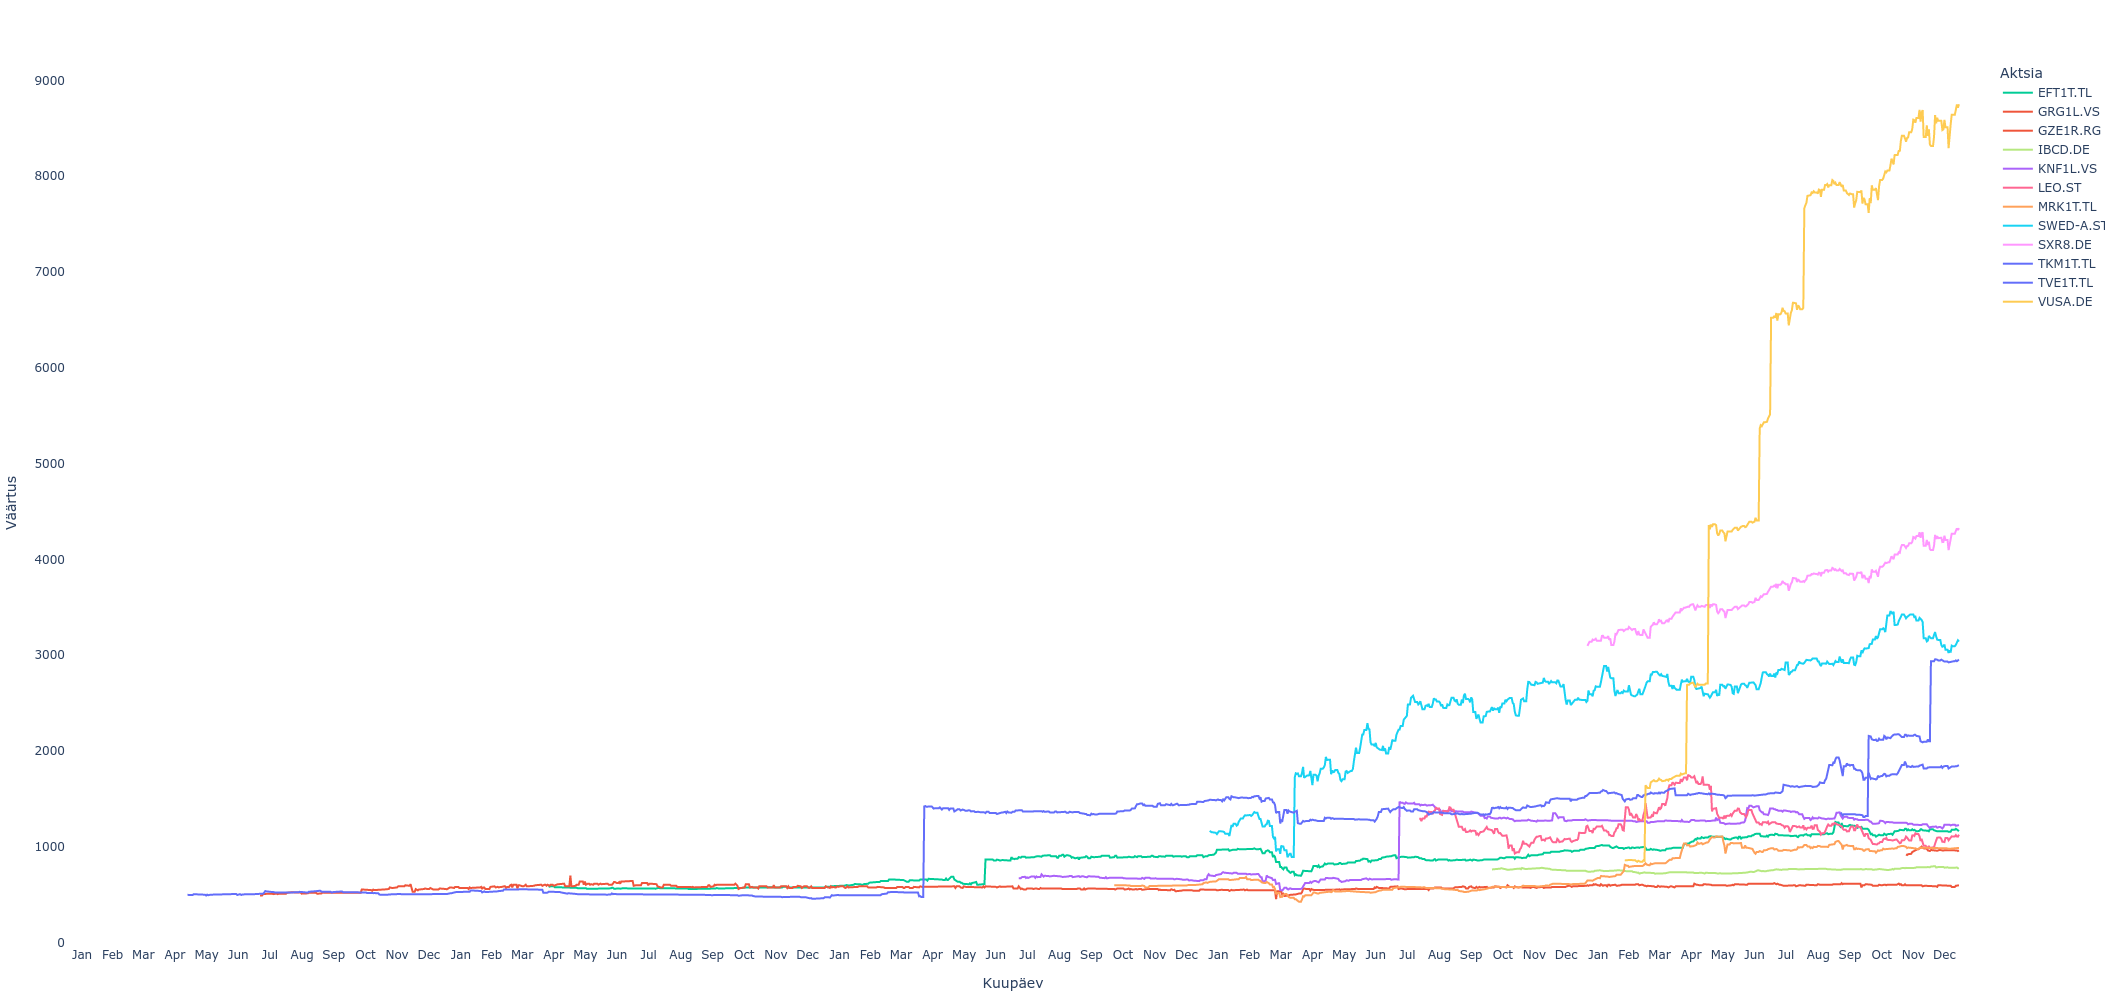

In [91]:
# using Plots
using PlotlyJS

# plotlyjs()

lbls = [x for x in names(yearportfoliodf) if x != "Kuupäev"]
plotdf = stack(yearportfoliodf, lbls)
plotdf = DataFrames.rename(plotdf, ["Kuupäev", "Aktsia", "Väärtus"])
plotdf = plotdf[plotdf."Väärtus" .> 0,:]

layout = Layout(
    xaxis_title="Kuupäev",
    yaxis_title="Väärtus",
    legend_title_text="Aktsiad",
    xaxis=attr(dtick="M1", tickformat="%b", ticklabelmode="period", range=[periodstart, periodend]),
    plot_bgcolor="white",
    width=1800, height=1000,
)

PlotlyJS.plot(plotdf, x=:Kuupäev, y=:Väärtus, color=:Aktsia, legend = :outertopright, layout)


In [92]:
for c in currencies
    range = (alltradesdf."VALUUTA" .== c) .& (alltradesdf."TEHINGUPÄEV" .>= periodstart)
    prices = alltradesdf[range, "KOKKU"]
    days = alltradesdf[range, "TEHINGUPÄEV"]
    rates = [last(currenciesdf[(currenciesdf."timestamp" .<= d) .& (currenciesdf."Ticker" .== c), "Close"]) for d in days]
    alltradesdf[range, "KOKKU"] = prices .* rates
end

In [93]:
invested = -sum(alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), "KOKKU"])

23339.709363979997

In [94]:
growth = sum(last(yearportfoliodf)[1:end-1]) - sum(first(yearportfoliodf)[1:end-1])

27872.61032181861

In [95]:
profit = growth - invested

4532.900957838614

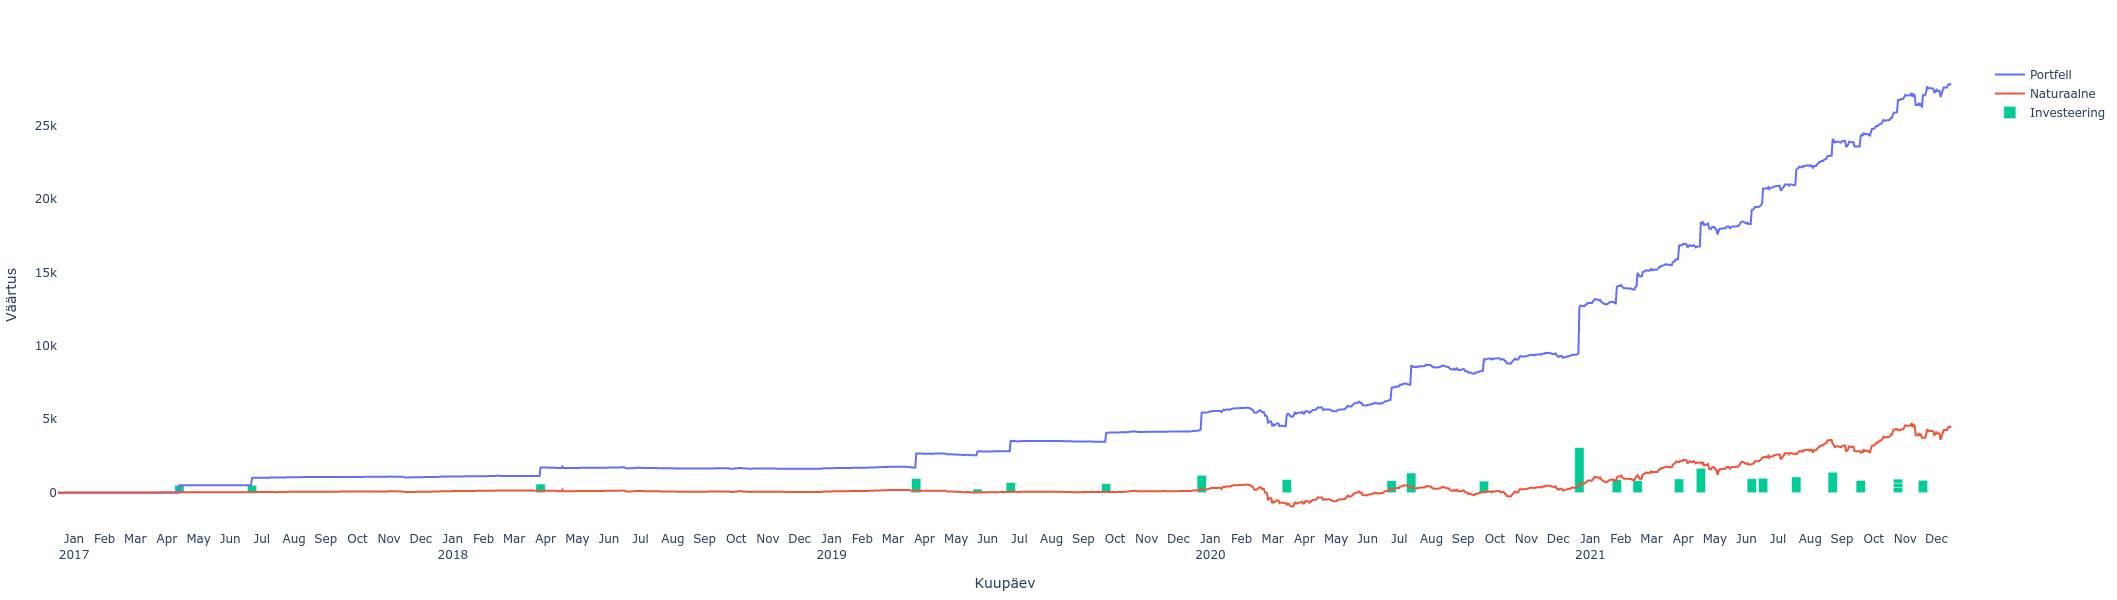

In [96]:
plotdf = plotdf = yearportfoliodf[!, ["Kuupäev"]]
plotdf."KOKKU" = sum.(eachrow(yearportfoliodf[!, names(yearportfoliodf)[1:end-1]]))

df = yearportfoliodf[!, ["Kuupäev"]]
df."KOKKU" = sum.(eachrow(yearportfoliodf[!, names(yearportfoliodf)[1:end-1]]))
yearbuysdf = alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), ["TEHINGUPÄEV", "KOKKU"]]
for row in eachrow(df)
    row."KOKKU" += yearbuysdf[row."Kuupäev" .>= yearbuysdf."TEHINGUPÄEV", "KOKKU"] |> sum
end

df2 = alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), ["TEHINGUPÄEV", "KOKKU"]]
df2."KOKKU" = -df2."KOKKU"

layout = Layout(
    xaxis_title="Kuupäev",
    yaxis_title="Väärtus",
    xaxis=attr(dtick="M1", tickformat="%b\n%Y", ticklabelmode="period", range=[periodstart, periodend]),
    plot_bgcolor="white",
    width=1800, height=600,
    barmode="relative"
)
plot(
    [
     scatter(plotdf, x=:Kuupäev, y=:KOKKU, name="Portfell")
     scatter(df, x=:Kuupäev, y=:KOKKU, name="Naturaalne")
     bar(df2, x=:TEHINGUPÄEV, y=:KOKKU, name="Investeering")
    ],
    layout
)

In [97]:
profitlossfiles = glob("data/*-profit-loss.csv")

5-element Vector{String}:
 "data/2017-profit-loss.csv"
 "data/2018-profit-loss.csv"
 "data/2019-profit-loss.csv"
 "data/2020-profit-loss.csv"
 "data/2021-profit-loss.csv"

In [98]:
allprofitlossdf = reduce(vcat, DataFrame.(CSV.File.(profitlossfiles)));

In [99]:
show(describe(allprofitlossdf), allcols=true)

11×7 DataFrame
 Row │ variable                           mean      min                                median      max                                nmissing  eltype   
     │ Symbol                             Union…    Any                                Any         Any                                Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Laekumise kuupäev                            2017-12-05                         2021-02-23  2021-11-05                                0  Date
   2 │ Väärtpaber                                   EFT1T - EfTEN Real Estate Fund I…              VUSA - VANGUARD S&P 500 UCITS ETF         0  String
   3 │ Valuuta                                      EUR                                            USD                                       0  String3
   4 │ Laekunud summa aktsia kohta valu…  0.769181  0.0198162          

In [100]:
yearprofitlossdf = allprofitlossdf[(allprofitlossdf."Laekumise kuupäev" .>= periodstart) .& (allprofitlossdf."Laekumise kuupäev" .<= periodend),:]

,Laekumise kuupäev,Väärtpaber,Valuuta,Laekunud summa aktsia kohta valuutas
,Date,String,String3,Float64
1,2017-12-05,GZE1R - Latvijas Gaze,EUR,0.88
2,2018-04-10,TKM1T - Tallinna Kaubamaja Grupp,EUR,0.69
3,2018-04-20,EFT1T - EfTEN Real Estate Fund III,EUR,0.68
4,2018-07-04,GZE1R - Latvijas Gaze,EUR,0.45
5,2018-10-18,GZE1R - Latvijas Gaze,EUR,0.13
6,2019-04-12,TKM1T - Tallinna Kaubamaja Grupp,EUR,0.505438
7,2019-04-12,TKM1T - Tallinna Kaubamaja Grupp,EUR,0.204562
8,2019-05-09,EFT1T - EfTEN Real Estate Fund III,EUR,0.9209
9,2019-05-09,EFT1T - EfTEN Real Estate Fund III,EUR,0.0291


In [101]:
totaldividend = yearprofitlossdf."Kokku EUR" |> sum

1011.17

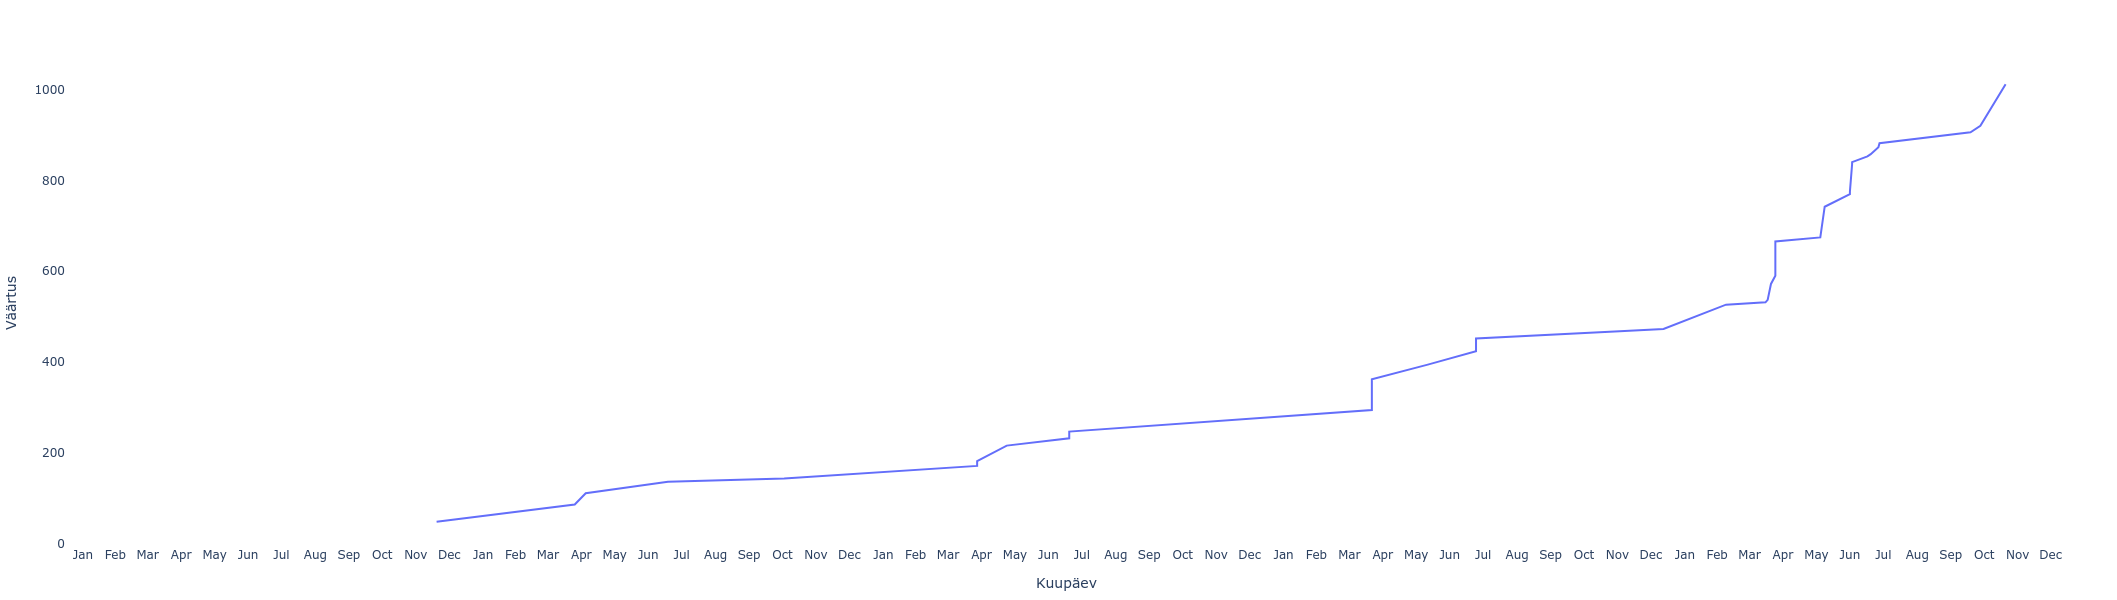

In [102]:
plotdf = DataFrame()
plotdf."Kuupäev" = yearprofitlossdf[!, "Laekumise kuupäev"]
plotdf."Kokku" = cumsum(yearprofitlossdf."Kokku EUR")

layout = Layout(
    xaxis_title="Kuupäev",
    yaxis_title="Väärtus",
    legend_title_text="Aktsiad",
    xaxis=attr(dtick="M1", tickformat="%b", ticklabelmode="period", range=[periodstart, periodend]),
    plot_bgcolor="white",
    width=1800, height=600,
)

PlotlyJS.plot(plotdf, x=:Kuupäev, y=:Kokku, layout)

In [103]:
avg_portfolio = sum.(eachrow(yearportfoliodf[!, names(yearportfoliodf)[1:end-1]])) |> mean
dividend_yield = totaldividend / avg_portfolio

0.1574691949461682

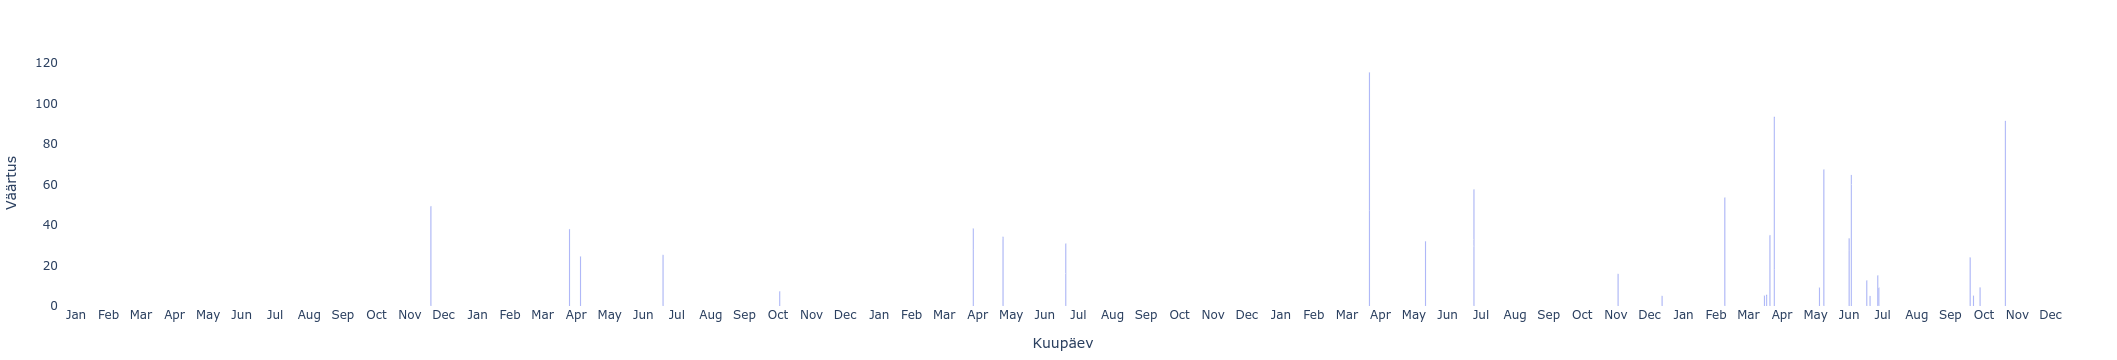

In [104]:
df = DataFrame()
df."Kuupäev" = yearprofitlossdf."Laekumise kuupäev"
df."KOKKU" = yearprofitlossdf."Kokku EUR"

layout = Layout(
    xaxis_title="Kuupäev",
    yaxis_title="Väärtus",
    legend_title_text="Aktsiad",
    xaxis=attr(dtick="M1", tickformat="%b", ticklabelmode="period", range=[periodstart, periodend]),
    plot_bgcolor="white",
)

plot(bar(df, x=:Kuupäev, y=:KOKKU, name="Dividend/Intress"), layout)

In [105]:
df = yearportfoliodf[!, ["Kuupäev"]]
df."Kokku" = sum.(eachrow(yearportfoliodf[!, names(yearportfoliodf)[1:end-1]]))
yearbuysdf = alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), ["TEHINGUPÄEV", "KOKKU"]]
for row in eachrow(df)
    row."Kokku" += yearbuysdf[row."Kuupäev" .>= yearbuysdf."TEHINGUPÄEV", "KOKKU"] |> sum
end

In [106]:
yearstd = std(df."Kokku")

1082.2372786434876

In [107]:
yearstd / avg_portfolio

0.168536480521299

In [111]:
profit / avg_portfolio

0.7059072802808245